<a href="https://colab.research.google.com/github/founderphil/NYU-DL-pytorch-cifar/blob/master/DL_hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# homework 3 - Phil Olarte pao9186

### Question 1

In class we derived a general form of policy gradients. Let us consider a special case here which does not involve any neural networks. Suppose the step size is $\eta$. We consider the so-called *bandit* setting where past actions and states do not matter, and different actions $a_i$ give rise to different rewards $R_i$.

1.   a. Define the mapping $\pi$ such that $\pi(a_i) = {softmax}(\theta_i)$ for $i = 1, \ldots, k$, where $k$ is the total number of actions and $\theta_i$ is a scalar parameter encoding the value of each action. Show that if action $a_i$ is sampled, then the change in the parameters is given by:

<center>$\Delta \theta_i = \eta R_i (1 - \pi(a_i)).$</center>

2.   b. If constant step sizes are used, intuitively explain why the above update rule might lead to unstable training. How would you fix this issue to ensure convergence of the parameters?

### Answers 1a-b

#### ***Answer 1a. Defining the function $\pi$***

The softmax fuction is a way to convert real values into a probability distribution. We need to define a function $\pi$ that calcuates probabilities:

The softmax function for a given action $a_i$ is:

$\pi(a_i) = \frac{e^{\theta_i}}{\sum_{j=1}^{k} e^{\theta_j}}$

When we pick action $a_i$ and receive a reward $R_i$ we update $\theta$ using the formula:

$\Delta \theta_i = \eta R_i (1 - \pi(a_i)).$

This rule means we adjust $\theta_i$ based on the reward $R_i$, but scales down by how likely we were to pick $a_i$. If $\pi(a_i)$ is high the adjustment is smaller.

#### ***Answer 1b. Dealing with constant step size***

If constant step sizes $\eta$ are used, the update rule can potentially cause unstable training if it doesnt change much. If $\eta$ is too big, our parameter updates would overshoot the target, casuing $\theta$ to be volitle. If too small, updates would be too slow.

One way to fix this is gradually adjust learning rate on a schedule that decreases the step size.

Another approach could be to use adaptive step size methods like Adam that adjusts $\eta$ automatically, helping stablize and speed up the learning process.

### Question 2 Minimax Optimization Problem

In this problem, we will explore how training GANs (Generative Adversarial Networks) is fundamentally different from regular training methods. Consider a simple problem where we are trying to minimax a function of two scalars:

$$
\text{min}_{x} \ \text{max}_{y} \ f(x, y) = 4x^2 - 4y^2.
$$

You can try graphing this function in Python if you like (no need to include it in your answer).


1. **a. Determine the saddle point of this function.**  
   A saddle point is a point $(x, y)$ for which $f$ attains a local minimum along one direction and a local maximum in an orthogonal direction.

2. **b. Write down the gradient descent/ascent equations for solving this problem**  
   Start from some arbitrary initialization $(x_0, y_0)$.

3. **c. Determine the range of allowable step sizes**  
   Ensure that gradient descent/ascent converges.

4. **d. Discuss the effect of using regular gradient descent over both variables instead.**  
   Comment on the dynamics of the updates and whether there are special cases where one might converge to the saddle point anyway.


### Answers to Q2a-b

#### ***a. Determining the Saddle Point***

To find the saddle point, we need to computer the partial derivatives and set them to zero.

So the critial point is at (0,0). To determinte the nature of (0,0), we plot them. along x-axis (y=0) $f(x,0) = 4x^2$, it is a parabola opening upwards with a minimum at x=0. Along the y-axis (x=0), $f(0,y) = -4y^2$ is an inverted parabola, with a max of y=0. Thus (0,0) is the saddle point since $f$ attains a local min along x and max along y.
</br></br>
#### ***b. Gradient Descent/Ascent Equation***
To find the best values of $x$ and $y$:

For $(x)$ (minimization) we use gradient *descent* which repeatedly updates $x$ by small steps in the direction that decreases $f$, and $(y)$ (maximization) we use gradient *ascent* but step in the direction that increases $f$. At \( ($x_0, y_0$) \), the update rules are:

- $( x_{n+1} = x_n - \eta_x (8x_n))$
- $( y_{n+1} = y_n + \eta_y (-8y_n))$

Where $(\eta_x)$ and $(\eta_y)$ are the learning rates for \( x \) and \( y \) respectively.
</br></br>
#### ***c. Range of Allowable Step Sizes***
The step size, or learning rate, for  $(\eta_x)$ and $(\eta_y)$ must be within a range so to not overshoot the min or max, or move too slow. Both $(\eta_x)$ and $(\eta_y)$ should be positive and less than $(\frac{1}{8})$ to avoid overshooting and ensure stability in the updates as $x$ and $y$ move to the saddle point.
</br></br>
#### ***d. Regular Gradient Descent Over Both Variables***
If we use regular gradient descent for both $x$ and $y$ variables:
Updates would be:
- $( x_{n+1} = x_n - \eta \frac{\partial f}{\partial x})$ and $( y_{n+1} = y_n - \eta \frac{\partial f}{\partial y} )$, leading both $(x)$ and $(y)$ to converge to 0.
- This approach might still reach the saddle point but is generally less efficient or reliable for GANs where different objectives for both $x$ and $y$  are typical.
- special cases to reach the saddle point is $x$ and $y$ have the same learning rate or small initial values of $x$ and $y$ are close to (0,0). Generally it is better to separate optimization directions for $x$ and $y$ when training GANs.

### Question 3

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, LeakyReLU, Reshape, Conv2DTranspose, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### a. load data and pre-process it

In [ ]:
# a. load data and pre-process it
import tensorflow as tf

def load_fashion_mnist():
    # Load the FashionMNIST dataset
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

    # Normalize the images to [-1, 1]
    train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
    train_images = (train_images - 127.5) / 127.5  # Rescale to [-1, 1]

    # Only return the training images for GANs
    return train_images

# Load the dataset
train_images = load_fashion_mnist()

print(f'Shape of the training images: {train_images.shape}')


4422102/4422102 [==============================] - 0s 0us/step
Shape of the training images: (60000, 28, 28, 1)


### b. descriminator model architecture

In [ ]:
# b. descriminator model architecture
def build_discriminator():
    model = Sequential([
        Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=(28, 28, 1)),
        LeakyReLU(alpha=0.3),
        Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        LeakyReLU(alpha=0.3),
        Dropout(0.3),
        Flatten(),
        Dense(1)
    ])
    return model

# c. generator model architecture
def build_generator():
    model = Sequential([
        Dense(7*7*256, use_bias=False, input_shape=(100,)),
        BatchNormalization(),
        LeakyReLU(),
        Reshape((7, 7, 256)),
        Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
        BatchNormalization(),
        LeakyReLU(),
        Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        BatchNormalization(),
        LeakyReLU(),
        Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
    ])
    return model

### d. Loss and Optimizers

In [ ]:
# d. Loss and Optimizers
generator_optimizer = Adam(1e-4)
discriminator_optimizer = Adam(1e-4)

discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=discriminator_optimizer)

generator = build_generator()

In [ ]:
# Helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    # Total discriminator loss
    total_disc_loss = real_loss + fake_loss
    return total_disc_loss

def generator_loss(fake_output):
    # Generator tries to make the discriminator output 1 for fake images
    return cross_entropy(tf.ones_like(fake_output), fake_output)

### e. saving checkpoints, Training loop and generating images

In [ ]:
# Create a checkpoint directory
checkpoint_dir = '/content/drive/MyDrive/data/checkpoints/GAN_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

# Manager to manage saving checkpoints
manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=3)

In [ ]:
BATCH_SIZE = 32
noise_dim = 100
BUFFER_SIZE = 60000

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
# images

import matplotlib.pyplot as plt
import numpy as np

def generate_and_save_images(model, epoch, test_input):
    # Notice `training` is set to False
    # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

# Seed for reproducibility
seed = tf.random.normal([16, 100])  # 16 examples to visualize

In [ ]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

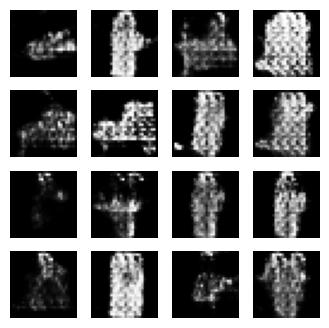

Epoch 1, Generator Loss: 1.757589340209961, Discriminator Loss: 0.9347444176673889
Epoch 2, Generator Loss: 1.023247241973877, Discriminator Loss: 0.9776520729064941
Epoch 3, Generator Loss: 1.6756123304367065, Discriminator Loss: 0.9870619773864746
Epoch 4, Generator Loss: 1.0119516849517822, Discriminator Loss: 1.2224767208099365
Epoch 5, Generator Loss: 1.4026204347610474, Discriminator Loss: 1.1237645149230957
Epoch 6, Generator Loss: 1.1011669635772705, Discriminator Loss: 1.1908838748931885
Epoch 7, Generator Loss: 1.5349838733673096, Discriminator Loss: 1.0386812686920166
Epoch 8, Generator Loss: 0.9267662763595581, Discriminator Loss: 1.1197214126586914
Epoch 9, Generator Loss: 1.1779403686523438, Discriminator Loss: 1.3521769046783447


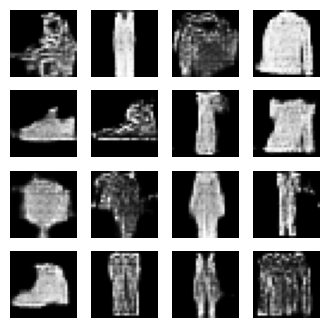

Epoch 10, Generator Loss: 1.1993982791900635, Discriminator Loss: 1.0388104915618896
Epoch 11, Generator Loss: 0.9575701355934143, Discriminator Loss: 1.1588547229766846
Epoch 12, Generator Loss: 1.356480360031128, Discriminator Loss: 0.9816567897796631
Epoch 13, Generator Loss: 1.0381513833999634, Discriminator Loss: 1.0544394254684448
Epoch 14, Generator Loss: 1.1990888118743896, Discriminator Loss: 1.2005887031555176
Epoch 15, Generator Loss: 1.5913139581680298, Discriminator Loss: 1.2016081809997559
Epoch 16, Generator Loss: 1.0319693088531494, Discriminator Loss: 0.9389755725860596
Epoch 17, Generator Loss: 1.0058543682098389, Discriminator Loss: 1.2701724767684937
Epoch 18, Generator Loss: 0.8195626735687256, Discriminator Loss: 1.2395899295806885
Epoch 19, Generator Loss: 1.1868659257888794, Discriminator Loss: 1.1788156032562256


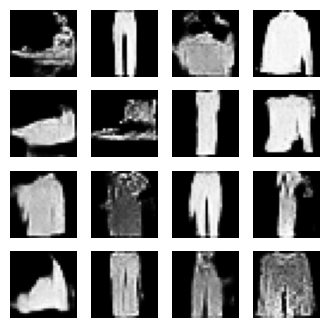

Epoch 20, Generator Loss: 1.179850459098816, Discriminator Loss: 1.0652179718017578
Epoch 21, Generator Loss: 1.005345106124878, Discriminator Loss: 1.131034255027771
Epoch 22, Generator Loss: 0.9352921843528748, Discriminator Loss: 1.1510918140411377
Epoch 23, Generator Loss: 1.035400629043579, Discriminator Loss: 1.154362678527832
Epoch 24, Generator Loss: 0.9996881484985352, Discriminator Loss: 1.1024572849273682
Epoch 25, Generator Loss: 1.1974050998687744, Discriminator Loss: 1.0141324996948242
Epoch 26, Generator Loss: 1.208372712135315, Discriminator Loss: 1.056088924407959
Epoch 27, Generator Loss: 0.7854459285736084, Discriminator Loss: 1.3160512447357178
Epoch 28, Generator Loss: 0.9115064144134521, Discriminator Loss: 1.1849617958068848
Epoch 29, Generator Loss: 1.0904680490493774, Discriminator Loss: 1.1724631786346436


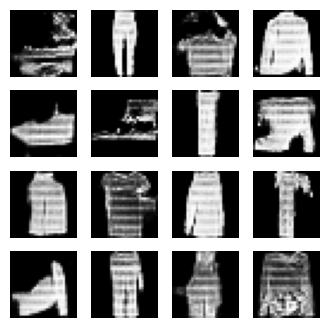

Epoch 30, Generator Loss: 1.198217511177063, Discriminator Loss: 0.9992105960845947
Epoch 31, Generator Loss: 1.0342824459075928, Discriminator Loss: 1.1199398040771484
Epoch 32, Generator Loss: 1.0790432691574097, Discriminator Loss: 1.2105088233947754
Epoch 33, Generator Loss: 0.9844388961791992, Discriminator Loss: 1.1809616088867188
Epoch 34, Generator Loss: 0.9926514029502869, Discriminator Loss: 1.2471567392349243
Epoch 35, Generator Loss: 1.250601053237915, Discriminator Loss: 1.1014761924743652
Epoch 36, Generator Loss: 1.6717982292175293, Discriminator Loss: 0.9139610528945923
Epoch 37, Generator Loss: 0.8587450385093689, Discriminator Loss: 1.2374757528305054
Epoch 38, Generator Loss: 0.8729133605957031, Discriminator Loss: 1.1712772846221924
Epoch 39, Generator Loss: 0.8200655579566956, Discriminator Loss: 1.2547842264175415


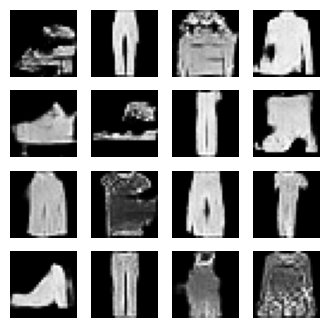

Epoch 40, Generator Loss: 0.9047074317932129, Discriminator Loss: 1.279679536819458
Epoch 41, Generator Loss: 0.8676153421401978, Discriminator Loss: 1.2251842021942139
Epoch 42, Generator Loss: 0.8848369121551514, Discriminator Loss: 1.1994558572769165
Epoch 43, Generator Loss: 0.9914001226425171, Discriminator Loss: 1.1976436376571655
Epoch 44, Generator Loss: 0.8648220300674438, Discriminator Loss: 1.1161473989486694
Epoch 45, Generator Loss: 0.9995095729827881, Discriminator Loss: 1.2978789806365967
Epoch 46, Generator Loss: 0.850808322429657, Discriminator Loss: 1.270230770111084
Epoch 47, Generator Loss: 0.9740071296691895, Discriminator Loss: 1.1765344142913818
Epoch 48, Generator Loss: 1.065342664718628, Discriminator Loss: 1.0315806865692139
Epoch 49, Generator Loss: 0.6266089677810669, Discriminator Loss: 1.4617520570755005


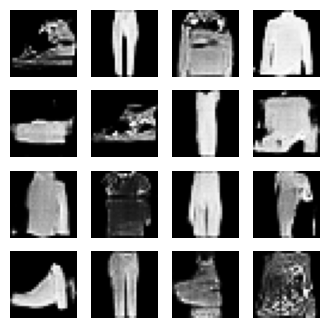

Epoch 50, Generator Loss: 1.2798824310302734, Discriminator Loss: 1.1021392345428467


In [ ]:
# e. Training loop for DCGAN using grayscale FashionMNIST dataset for 50 epochs
def train(dataset, epochs, noise_dim):
    for epoch in range(epochs):
        for image_batch in dataset:
            noise = tf.random.normal([BATCH_SIZE, noise_dim])

            with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
                generated_images = generator(noise, training=True)

                real_output = discriminator(image_batch, training=True)
                fake_output = discriminator(generated_images, training=True)

                gen_loss = generator_loss(fake_output)
                disc_loss = discriminator_loss(real_output, fake_output)

            gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
            gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

            generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
            discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

        # Produce images
        if (epoch + 1) % 10 == 0 or epoch == 0:
            generate_and_save_images(generator, epoch + 1, seed)

        # Save the model every 15 epochs, checkpoint
        if (epoch + 1) % 15 == 0:
            manager.save()

        print(f'Epoch {epoch+1}, Generator Loss: {gen_loss}, Discriminator Loss: {disc_loss}')

# TRAAAAAIN
train(train_dataset, 50, noise_dim)